# Forecasting CO2 emissions derived from animal protein consumption
#### 2. Data Visualization Notebook

In the previous Notebook, data is prepared and cleaned up. 

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read csv and create dataframe
df = pd.read_csv(r"C:\Users\Alba\Desktop\CodeOp project\Data\training_dataset.csv")
df.head(2)

Code      Country                     Region  Year  Gdp_pc_$  \
0  AFG  Afghanistan  South and South East Asia  1961    1309.0   
1  AFG  Afghanistan  South and South East Asia  1962    1302.0   

   Population Thousands Country Class  Fish & Seafood  Poultry Meat  Pig Meat  \
0               10043.0    Developing        0.010186      0.224101       0.0   
1               10267.0    Developing        0.010193      0.234435       0.0   

   ...  Total Protein (capita/day)  Fish & Seafood CO2  Poultry Meat CO2  \
0  ...                   12.427424            0.001231          0.012771   
1  ...                   12.374089            0.001232          0.013360   

   Pig Meat CO2  Beef Meat CO2  Lamb & Mutton CO2  Eggs CO2  Dairy CO2  \
0           0.0       1.011312           0.628845  0.012004   0.644616   
1           0.0       1.052629           0.609008  0.012870   0.636739   

   Total CO2 (capita/day)  Country Total CO2/day  
0                2.310778           23207.146569  
1                2.325837           23879.369416  

[2 rows x 25 columns]

### Data Visualization

Text(0, 0.5, 'Total Protein (capita/day)')

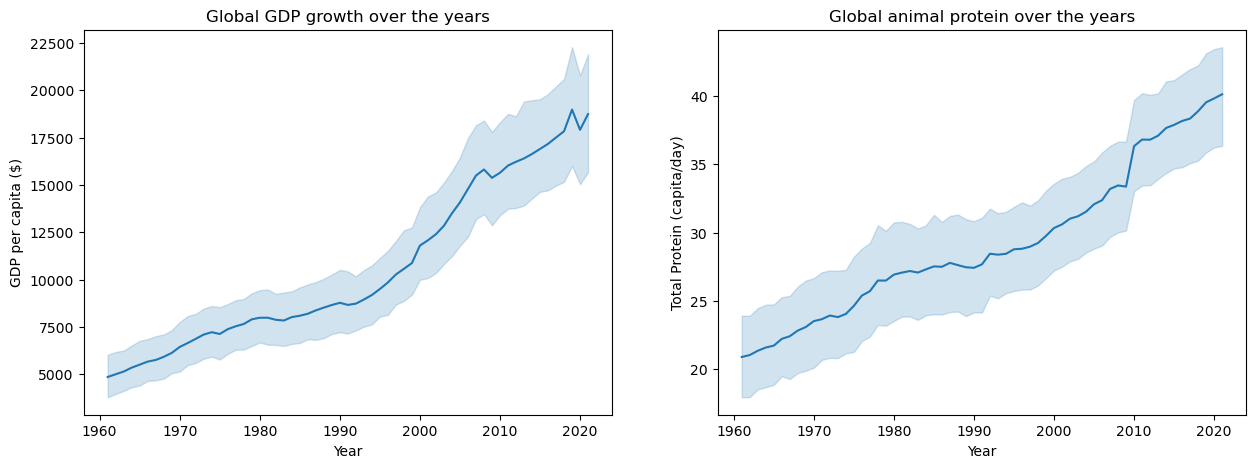

In [3]:
#Global GDP and animal protein consumption over the years trends
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.lineplot(x="Year", y="Gdp_pc_$", data=df)
plt.title("Global GDP growth over the years")
plt.xlabel("Year")
plt.ylabel("GDP per capita ($)")

plt.subplot(1,2,2)
sns.lineplot(x="Year", y="Total Protein (capita/day)", data=df)
plt.title("Global animal protein over the years")
plt.xlabel("Year")
plt.ylabel("Total Protein (capita/day)")

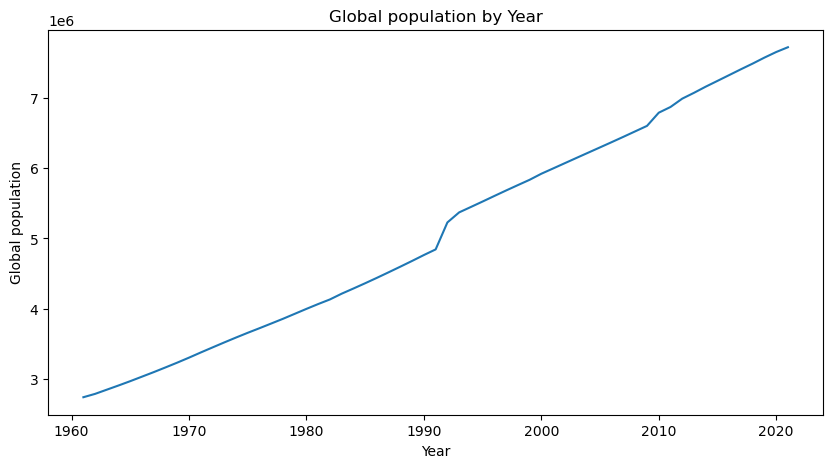

In [17]:
#Global population over the years
df_grouped = df.groupby('Year')['Population Thousands'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Population Thousands", data=df_grouped)
plt.title("Global population by Year")
plt.xlabel("Year")
plt.ylabel("Global population")
plt.show()

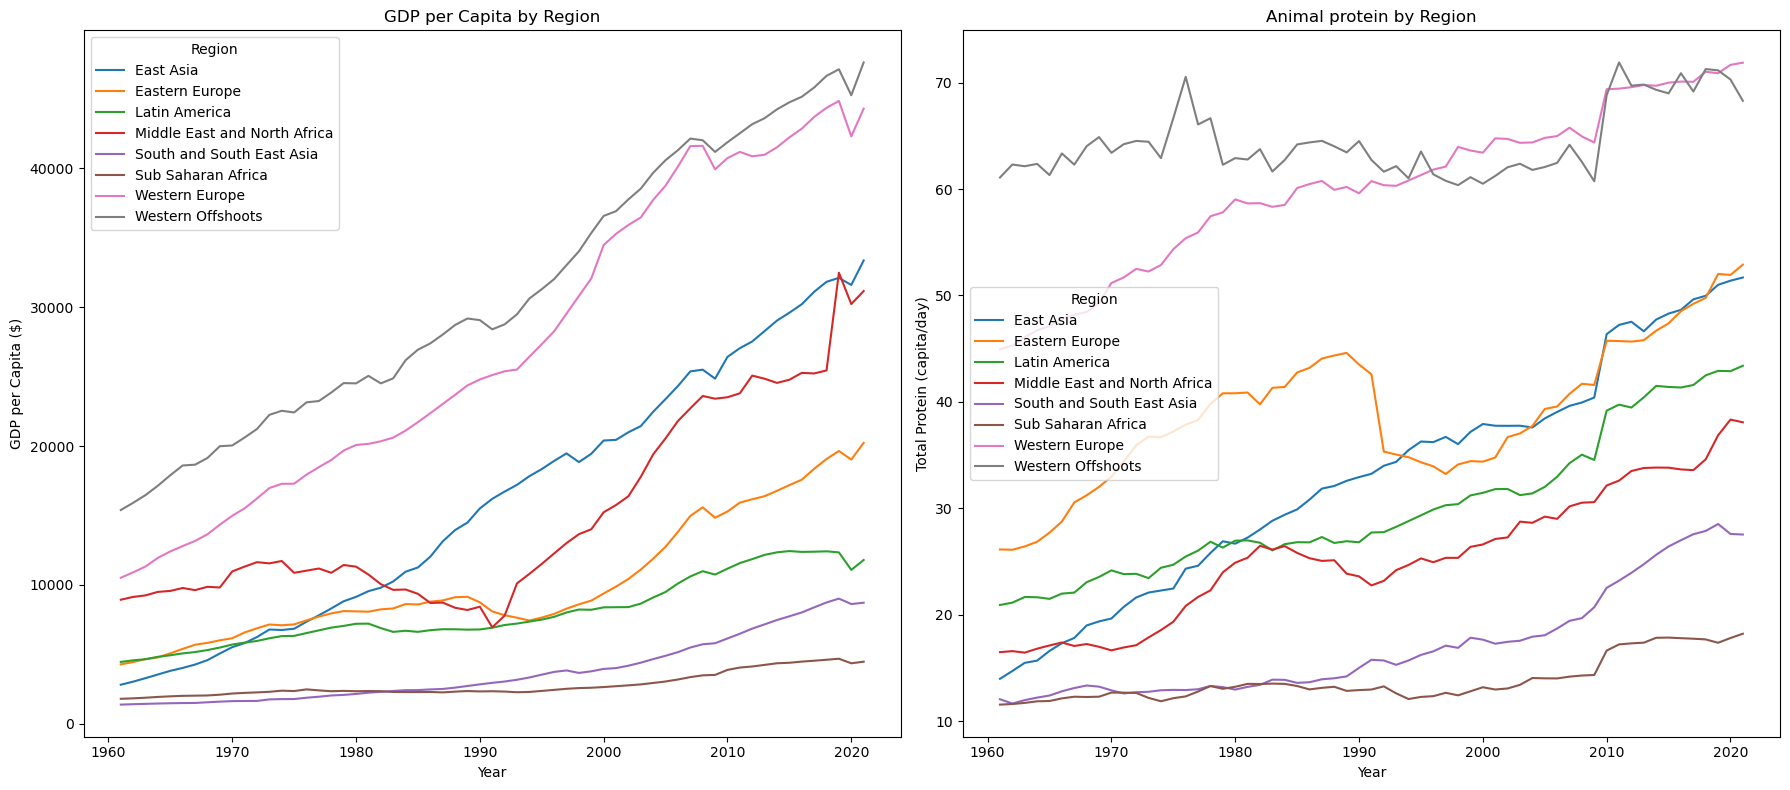

In [5]:
#Regional GDP and animal protein over the years trends
grouped_df_gdp = df.pivot_table(values="Gdp_pc_$", index="Year", columns="Region")
grouped_df_protein = df.pivot_table(values="Total Protein (capita/day)", index="Year", columns="Region")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

grouped_df_gdp.plot(ax=axes[0], title='GDP per Capita by Region')
axes[0].set_ylabel('GDP per Capita ($)')

grouped_df_protein.plot(ax=axes[1], title='Animal protein by Region')
axes[1].set_ylabel('Total Protein (capita/day)')

plt.tight_layout()
plt.show()

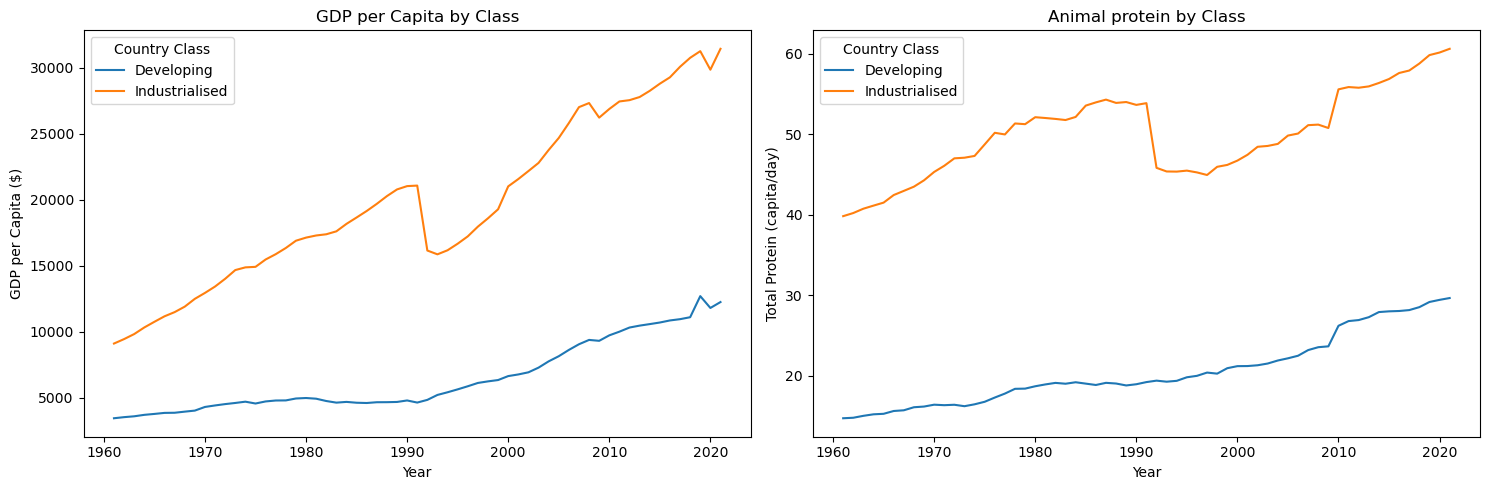

In [6]:
#GDP and animal protein by country classification
grouped_df_gdp_class = df.pivot_table(values="Gdp_pc_$", index="Year", columns="Country Class")
grouped_df_protein_class = df.pivot_table(values="Total Protein (capita/day)", index="Year", columns="Country Class")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

grouped_df_gdp_class.plot(ax=axes[0], title='GDP per Capita by Class')
axes[0].set_ylabel('GDP per Capita ($)')

grouped_df_protein_class.plot(ax=axes[1], title='Animal protein by Class')
axes[1].set_ylabel('Total Protein (capita/day)')

plt.tight_layout()
plt.show()

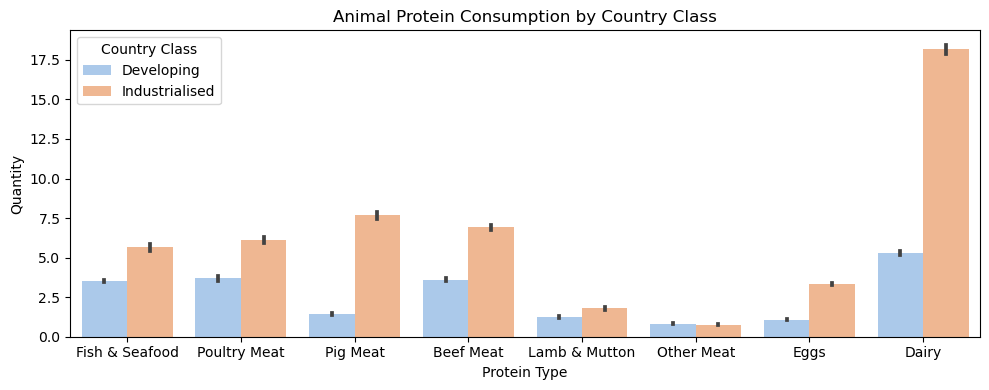

In [7]:
#Animal protein types by country classification

df_copy = df.copy()
df_copy.set_index('Country Class', inplace=True)

#Define animal protein columns
meat_columns = ["Fish & Seafood", "Poultry Meat", "Pig Meat", "Beef Meat", "Lamb & Mutton", "Other Meat", "Eggs", "Dairy"]
meat_df = df_copy[meat_columns]

meat_df = meat_df.reset_index().melt(id_vars='Country Class', var_name='Meat Type', value_name='Quantity')
plt.figure(figsize=(10, 4))
sns.barplot(data=meat_df, x='Meat Type', y='Quantity', hue='Country Class', palette='pastel')

plt.title('Animal Protein Consumption by Country Class')
plt.xlabel('Protein Type')
plt.ylabel("Quantity")
plt.legend(title='Country Class')
plt.tight_layout()
plt.show()

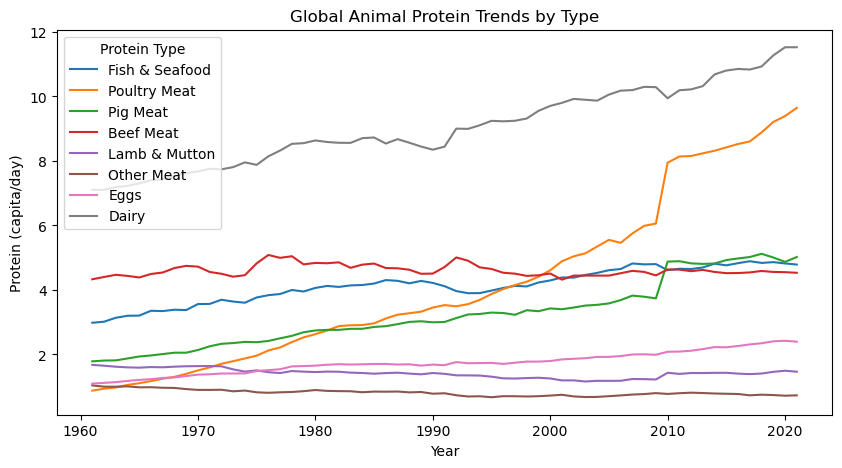

In [8]:
#Trends of each type of protein

plt.figure(figsize=(10, 5))

plt.title("Global Animal Protein Trends by Type")

for protein in meat_columns:
    sns.lineplot(x="Year", y=protein, data=df, label=protein, errorbar=None)

plt.xlabel("Year")
plt.ylabel("Protein (capita/day)")
plt.legend(title="Protein Type")

plt.show()

<Axes: >

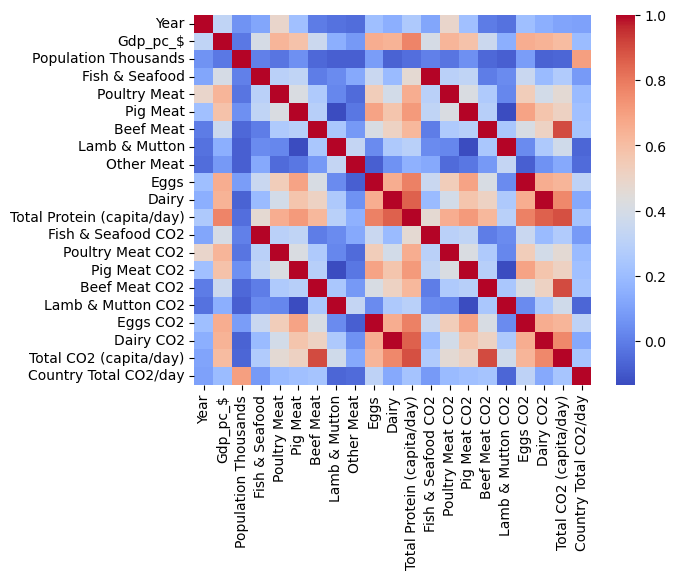

In [10]:
the_corrs = df.corr(numeric_only=True)
sns.heatmap(
    the_corrs,
    cmap="coolwarm",
)

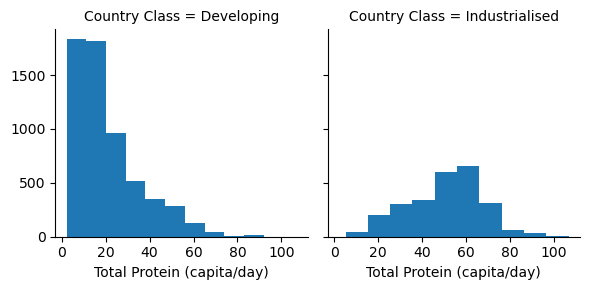

In [18]:
grid = sns.FacetGrid(data=df, col="Country Class")
grid.map(plt.hist, "Total Protein (capita/day)")

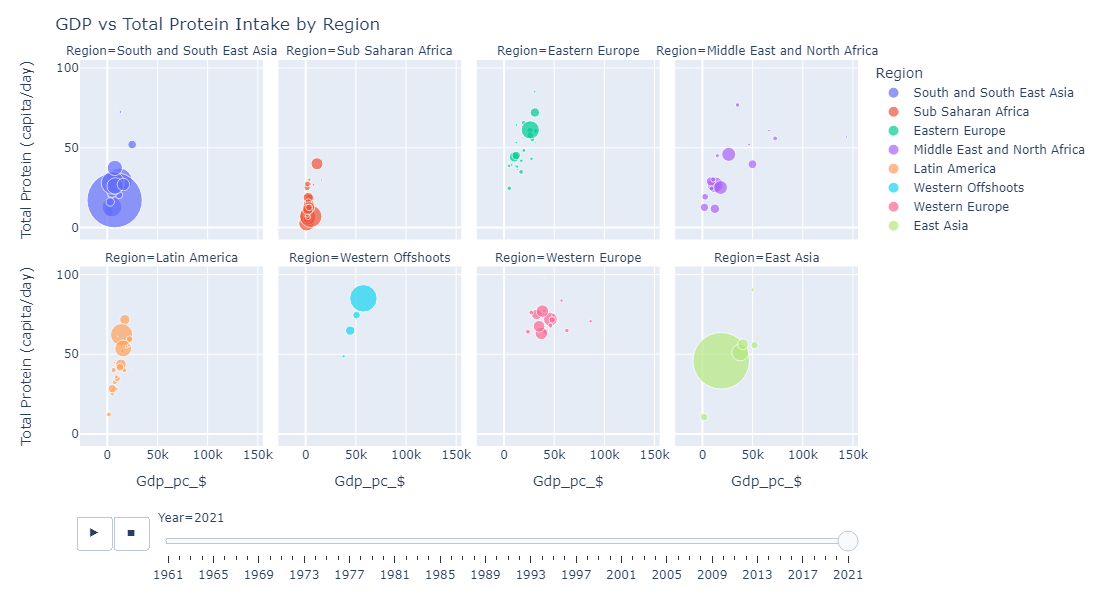

In [39]:
fig = px.scatter(
    df, 
    x="Gdp_pc_$", 
    y="Total Protein (capita/day)", 
    color="Region", facet_col="Region", 
    hover_name="Country", 
    size="Population Thousands", 
    size_max=40, 
    animation_frame="Year", 
    facet_col_wrap=4) 
fig.update_layout(
    height=600, 
    title_text="GDP vs Total Protein Intake by Region") 
fig.show()

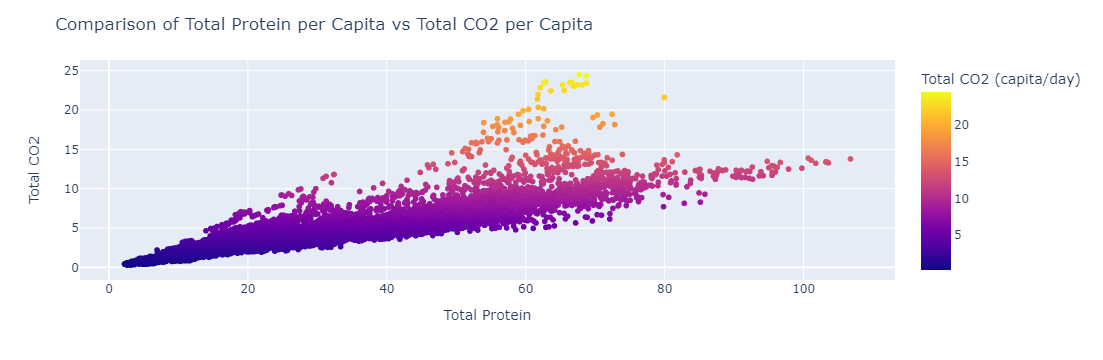

In [40]:

fig = px.scatter(df, x='Total Protein (capita/day)', y='Total CO2 (capita/day)', color='Total CO2 (capita/day)')
fig.update_layout(
    title='Comparison of Total Protein per Capita vs Total CO2 per Capita',
    xaxis_title='Total Protein',
    yaxis_title='Total CO2'
)
fig.show()

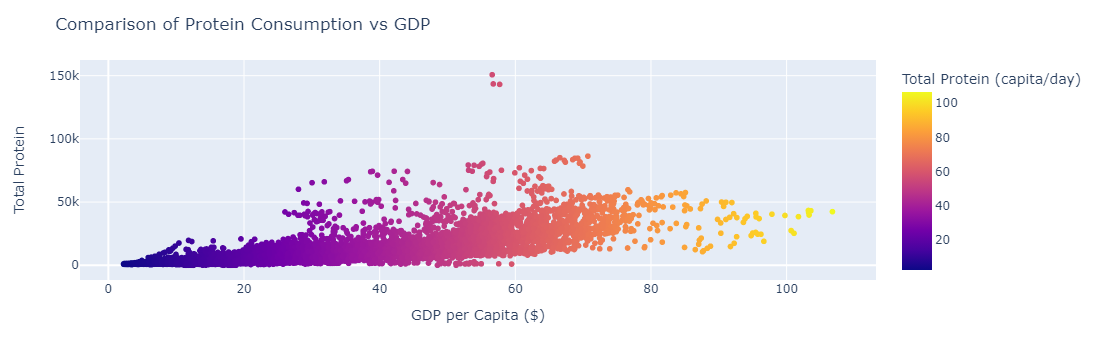

In [41]:

fig = px.scatter(df, x='Total Protein (capita/day)', y='Gdp_pc_$', color='Total Protein (capita/day)')
fig.update_layout(
    title='Comparison of Protein Consumption vs GDP',
    xaxis_title='GDP per Capita ($)',
    yaxis_title='Total Protein'
)
fig.show()

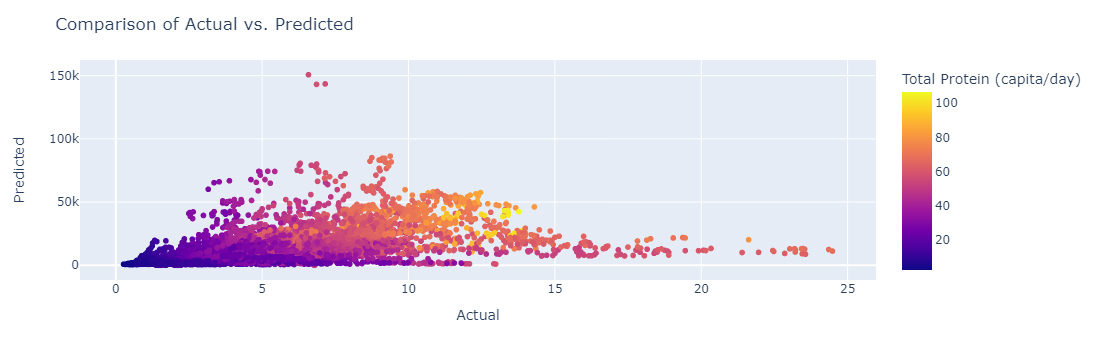

In [37]:

fig = px.scatter(df, x='Total CO2 (capita/day)', y='Gdp_pc_$', color='Total Protein (capita/day)')
fig.update_layout(
    title='Comparison of Actual vs. Predicted',
    xaxis_title='Actual',
    yaxis_title='Predicted'
)
fig.show()

In [38]:
df = df.copy()
df_corr = df[['Gdp_pc_$', 'Population Thousands', 'Total Protein (capita/day)', 'Total CO2 (capita/day)', 'Country Total CO2/day']].corr()
df_corr = df_corr[['Country Total CO2/day']].sort_values(by='Country Total CO2/day', ascending=False).reset_index()
print(df_corr)

                        index  Country Total CO2/day
0       Country Total CO2/day               1.000000
1        Population Thousands               0.700884
2      Total CO2 (capita/day)               0.237134
3  Total Protein (capita/day)               0.227530
4                    Gdp_pc_$               0.194720
